<a href="https://colab.research.google.com/github/difkrit/DSI433/blob/main/DSI433_6309658869.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSI433 - การกำหนดราคาเชิงประกันภัยโดยใช้ข้อมูลจริง

## Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load dataset

### Dataset ที่ใช้ชื่อว่า Insurance Claim Analysis: Demographic and Health โดยเป็นการวิเคราะห์ถึงค่าสินไหมทดแทนจากข้อมูลของประชากรของผู้เอาประกันภัย

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/difkrit/DSI433/main/insurance_data.csv')
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [3]:
df.shape

(1340, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


ภายใน Dataset ประกอบไปด้วย


*   index
*   PatientID เลขประจำตัวของคนไข้
*   age อายุของคนไข้
*   gender เพศของคนไข้
*   bmi ค่าดัชนีมวลกายของคนไข้
*   bloodpressure ค่าความดันโลหิตของคนไข้
*   diabetic คนไข้เป็นโรคเบาหวานหรือไม่
*   children คนไข้มีลูกกี่คน
*   smoker คนไข้สูบบุหรี่หรือไม่
*   region ภูมิภาคที่คนไข้อาศัยอยู่
*   claim จำนวนค่าสินไหมทดแทนของคนไข้













In [5]:
df = df.drop(['index', 'PatientID'], axis=1)
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...
1335,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


ลบ column ที่เป็นลำดับของข้อมูลออก นั่นคือ index และ PatientID

In [6]:
df.duplicated().sum()

0

ตรวจสอบจำนวนแถวที่ซ้ำกัน พบว่าไม่มีแถวที่ซ้ำกัน

In [7]:
df.isnull().sum()

age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

ตรวจสอบค่าว่าง (missing values) พบว่า age และ region มีค่าว่างอยู่ 5 และ 3 ตามลำดับ

In [8]:
df['age'].mean().round()

38.0

In [9]:
df['age'] = df['age'].fillna('38')

เติมค่าว่างด้วยค่าเฉลี่ยของอายุ (age)

In [10]:
df.groupby('region').size().reset_index(name='count').sort_values(by='count', ascending=False)

,region,count
2,southeast,443
1,northwest,349
3,southwest,314
0,northeast,231


In [11]:
df['region'] = df['region'].fillna('southeast')

เติมค่าว่างด้วยฐานนิยมหรือค่าที่ปรากฎมากที่สุดของภูมิภาค (region)

In [12]:
df.isnull().sum()

age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

ตรวจสอบว่าค่าว่างทั้งหมดได้ถูกเติมเรียบร้อยและไม่มี missing value แล้ว

In [13]:
df['age'] = df['age'].astype('int64')

เปลี่ยน data type ของอายุ (age) เป็น integer

## Numerical variables

In [14]:
df.describe()

,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,38.078358,30.668955,94.157463,1.093284,13252.745642
std,11.082176,6.106735,11.434712,1.205334,12109.609288
min,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,47.000000,34.700000,99.000000,2.000000,16604.305000
max,60.000000,53.100000,140.000000,5.000000,63770.430000


In [15]:
num_cols = ['age', 'bmi', 'bloodpressure', 'children', 'claim']
cat_cols = ['gender', 'diabetic', 'smoker', 'region']

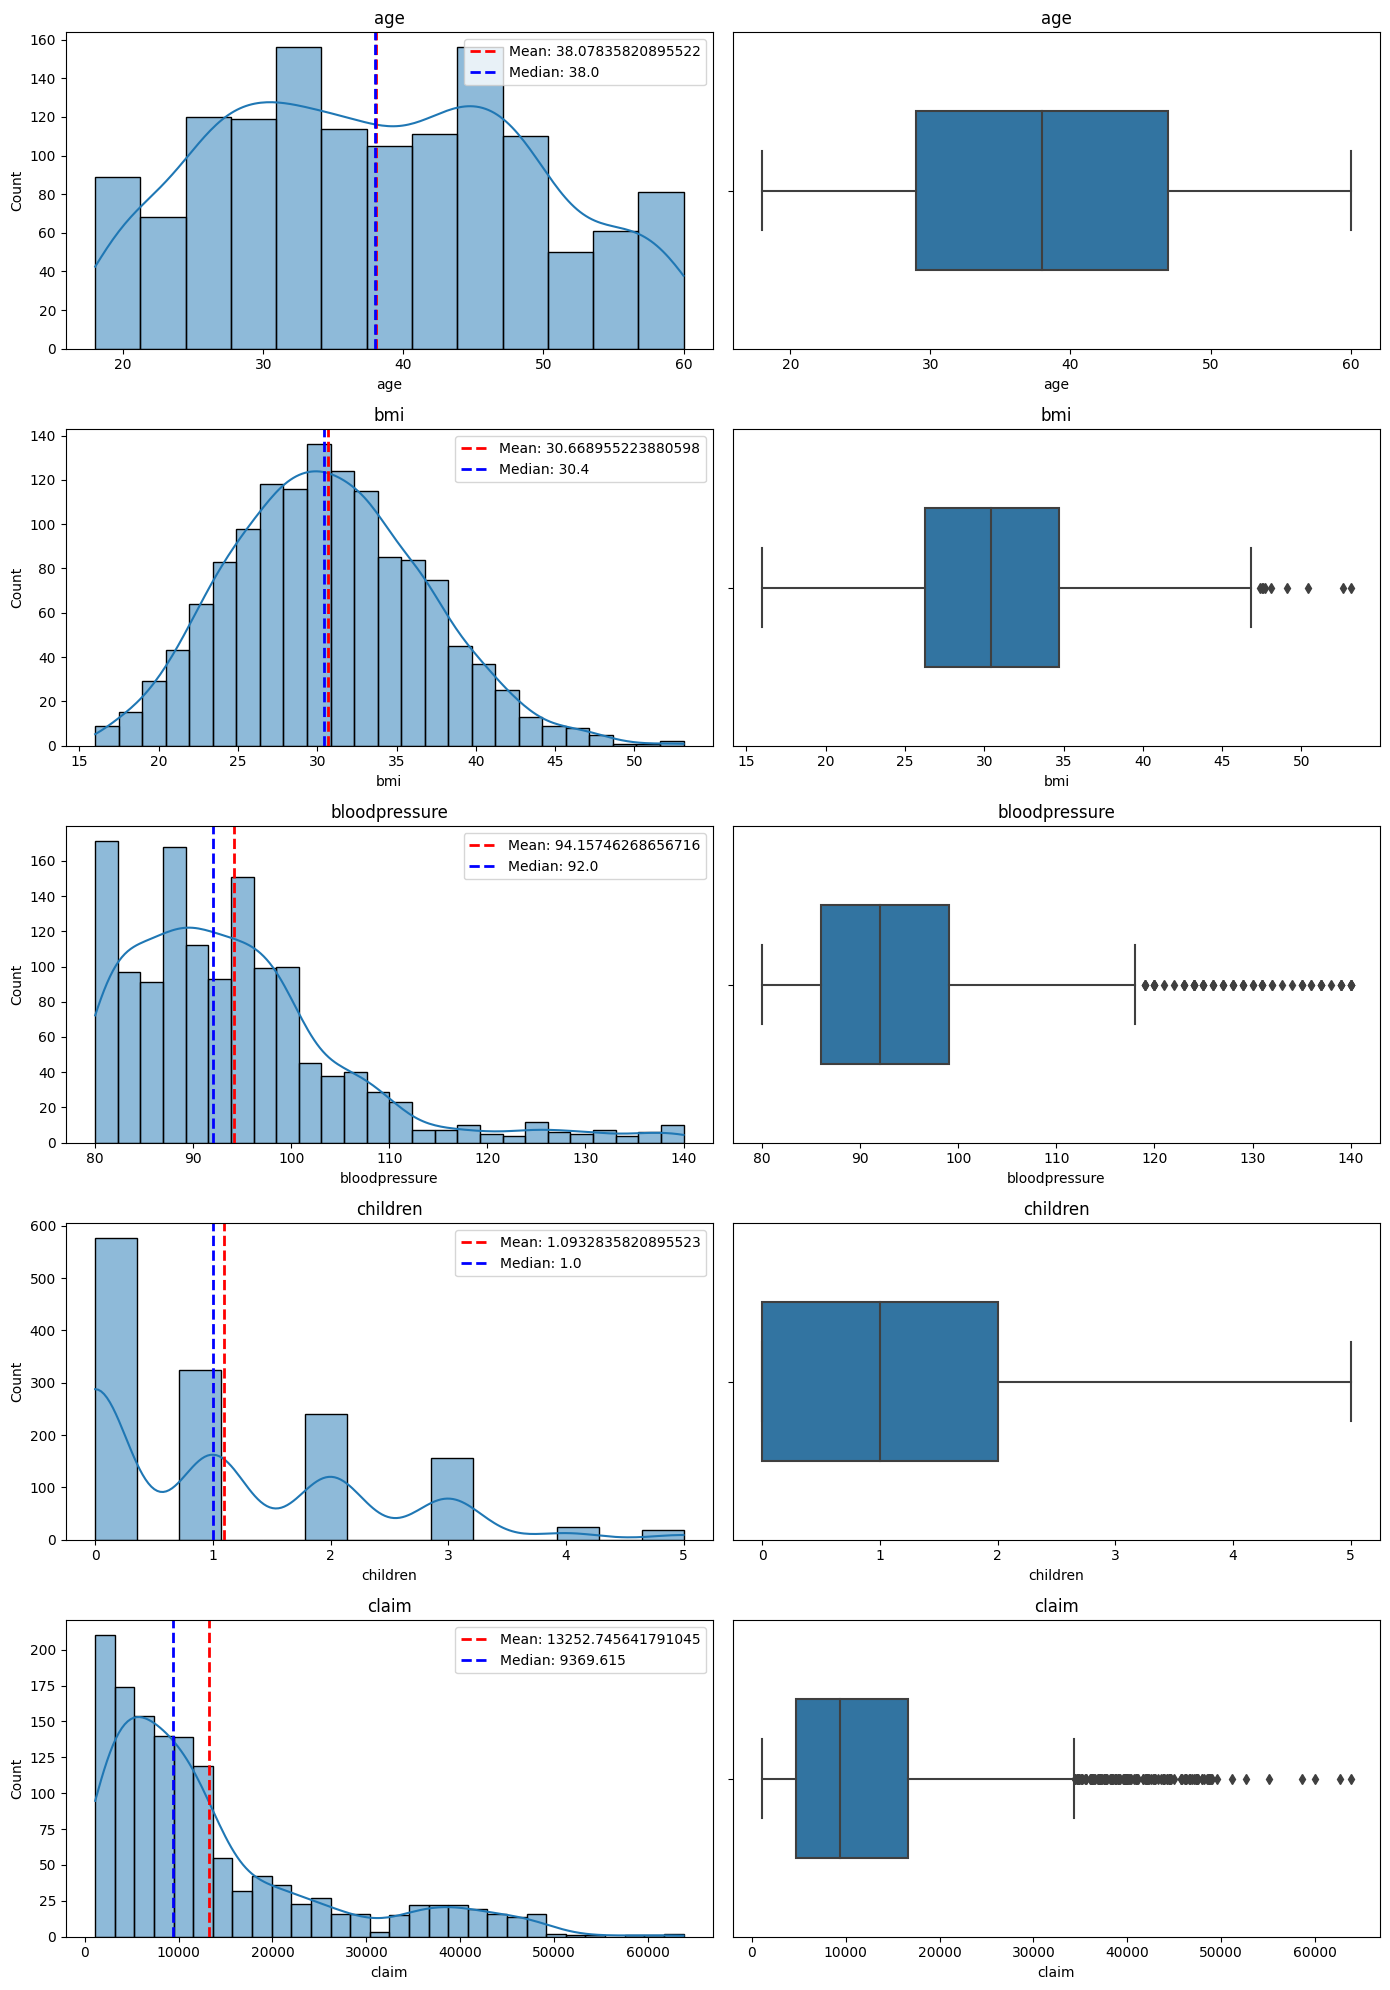

In [16]:
fig, axes = plt.subplots(5, 2, figsize=(14, 20))

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col}')

    mean = df[col].mean()
    median = df[col].median()
    axes[i, 0].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean}')
    axes[i, 0].axvline(median, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median}')
    axes[i, 0].legend()

    sns.boxplot(x=df[col], ax=axes[i, 1], width=0.5)
    axes[i, 1].set_title(f'{col}')

plt.grid(False)
plt.tight_layout()
plt.show()

แสดงข้อมูลทางสถิติของข้อมูลเชิงปริมาณ
*   **age** มีค่าเฉลี่ยที่ 38 ปี ช่วงอายุตั้งแต่ 18-60 ปี
*   มีการกระจายใกล้เคียงกับการกระจายแบบปกติ (Normal distribution)
*   ไม่มี Outliers

*   **bmi** มีค่าเฉลี่ยที่ 30.67 มีค่าตั้งแต่ 16.00-53.10
*   มีการกระจายแบบปกติ (Normal distribution)
*   มีบางค่าเป็น Outliers


*   **bloodpressure** มีค่าเฉลี่ยที่ 94 มีค่าตั้งแต่ 80-140
*   มีการกระจายแบบเบ้ขวา (Right Skewed)
*   มีบางค่าเป็น Outliers

*   **children** มีค่าเฉลี่ยที่ 1 คน จำนวนลูกมีตั้งแต่ 0-5 คน
*   คนไข้ส่วนใหญ่ไม่มีลูก

*   **claim** มีค่าเฉลี่ยที่ 13,252.75 ดอลลาร์ มีค่าตั้งแต่ 1,121.87-63,770.43 ดอลลาร์
*   มีการกระจายแบบเบ้ขวา (Right Skewed)
*   มีหลายค่าเป็น Outliers











## Categorical variables

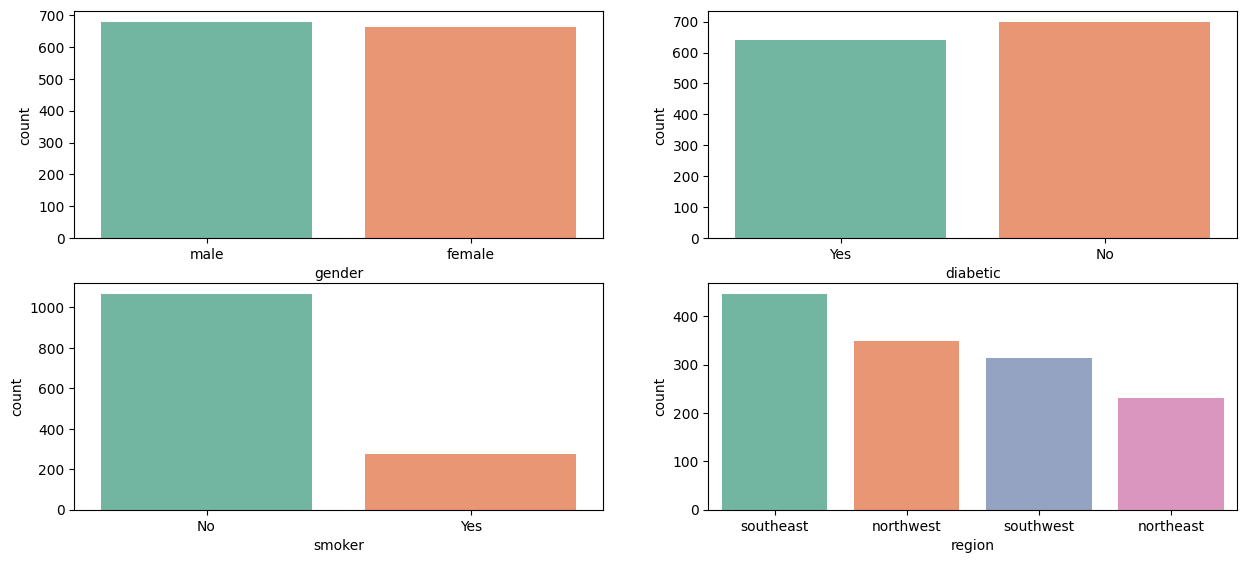

In [17]:
plt.figure(figsize = (15,10))
n = 1
for i in ['gender', 'diabetic', 'smoker', 'region']:
  plt.subplot(3, 2, n)
  sns.countplot(x = i, data = df, palette = 'Set2')
  n += 1

แสดงข้อมุลทางสถิติของข้อมูลเชิงคุณภาพ
*   **gender** จำนวนผู้ชายมากกว่าจำนวนผู้หญิงเล็กน้อย
*   **diabetic** จำนวนผู้เป็นโรคเบาหวานมีน้อยกว่าผู้ไม่เป็นโรคเบาหวานเล็กน้อย
*   **smoker** ส่วนใหญ่เป็นผู้ที่ไม่สูบบุหรี่ จำนวนผู้ที่ไม่สูบบุหรี่มีมากกว่าผู้ที่สูบบุหรี่
*   **region** ผู้ที่อาศัยภูมิภาคตะวันออกเฉียงใต้มีจำนวนมากที่สุด ผู้ที่อาศัยภูมิภาคตะวันออกเฉียงเหนือมีจำนวนน้อยที่สุด





# Correlation

<Axes: >

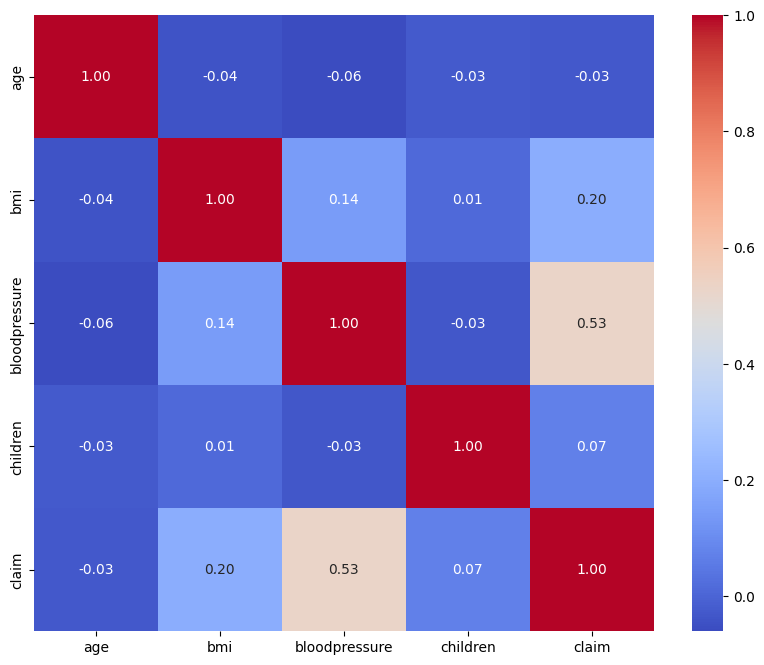

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap = 'coolwarm', fmt = '.2f', annot = True)

ความสัมพันธ์ระหว่างตัวแปร (Correlation)
*   **BMI และ Blood Pressure** มีความสัมพันธ์กันในเชิงบวกเล็กน้อย กล่าวได้ว่าเมื่อ BMI เพิ่มขึ้น Blood Pressure จะเพิ่มขึ้น
*  **Claim และ Age** มีความสัมพันธ์กันในเชิงลบเล็กน้อย กล่าวได้ว่าเมื่อมีอายุมากขึ้น ค่าสินไหมทดแทนจะลดลง
*   **Claim และ BMI** มีความสัมพันธ์กันในเชิงบวก กล่าวได้ว่าเมื่อ BMI เพิ่มขึ้น ค่าสินไหมทดแทนจะเพิ่มขึ้น
*   **Claim และ Blood Pressure** มีความสัมพันธ์กันในเชิงบวกอย่างมาก กล่าวได้ว่าเมื่อ Blood Pressure เพิ่มขึ้น ค่าสินไหมทดแทนจะเพิ่มขึ้น
*   **Claim และ Children** มีความสัมพันธ์กันในเชิงบวกเล็กน้อย กล่าวได้ว่าถ้ามีลูกมาก ค่าสินไหมทดแทนจะเพิ่มขึ้น








# Outlier

In [19]:
filtered_entries = np.array([True] * len(df))
for col in ['age', 'bmi', 'bloodpressure', 'children', 'claim']:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower = Q1 - (IQR * 1.5)
  upper = Q3 + (IQR * 1.5)

  filtered_entries = ((df[col] >= lower) & (df[col] <= upper)) & filtered_entries

df = df[filtered_entries]
df.shape

(1176, 9)

ทำการลบ Outliers ออกโดยเลือกข้อมูลที่มีค่าไม่เกิน Upper bound และไม่ต่ำกว่า Lower bound จาก IQR (Inter Quartile Range)

## Data Preprocessing

### Standardize Numerical variables

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
df_std = StandardScaler().fit_transform(df[num_cols])
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[num_cols].columns)
df_std

,age,bmi,bloodpressure,children,claim
0,0.068584,-1.153643,-0.100307,-0.896019,-1.240921
1,-1.281666,0.017009,-0.606577,-0.896019,-1.239511
2,-0.021433,0.559920,-1.239414,-0.896019,-1.238864
3,-0.021433,0.627784,-1.492549,-0.896019,-1.238796
4,-0.021433,0.695648,1.038800,-0.896019,-1.238707
...,...,...,...,...,...
1190,-0.831583,1.272491,1.798205,0.744010,3.490444
1191,-0.831583,0.118805,0.279395,-0.896019,3.491007
1193,0.698701,0.322397,-1.239414,-0.896019,3.531149
1195,1.868918,0.067907,-1.492549,-0.896019,3.554149


scale ข้อมูลให้มีค่าเฉลี่ยเท่ากับ 0 ส่วนเบี่ยงเบนมาตรฐานเท่ากับ 1 โดยใช้วิธี Standardization

### Label Encode Categorical variables

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
df_encode = df[cat_cols].copy()
for col in cat_cols:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])
df_encode

,gender,diabetic,smoker,region
0,1,1,0,2
1,1,0,0,2
2,1,1,0,2
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
1190,0,1,0,1
1191,1,0,1,0
1193,1,1,1,1
1195,0,0,1,1


แปลงค่าข้อมูลที่อยู่ในรูปแบบตัวอักษรให้เป็นตัวเลข โดยใช้วิธี Label Encoding เพื่อการนำไปเข้าสู่ model ต่อไป

In [24]:
df_final = df_std.merge(df_encode, left_index=True, right_index=True, how="left")
df_final

,age,bmi,bloodpressure,children,claim,gender,diabetic,smoker,region
0,0.068584,-1.153643,-0.100307,-0.896019,-1.240921,1,1,0,2
1,-1.281666,0.017009,-0.606577,-0.896019,-1.239511,1,0,0,2
2,-0.021433,0.559920,-1.239414,-0.896019,-1.238864,1,1,0,2
3,-0.021433,0.627784,-1.492549,-0.896019,-1.238796,1,0,0,1
4,-0.021433,0.695648,1.038800,-0.896019,-1.238707,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1190,-0.831583,1.272491,1.798205,0.744010,3.490444,0,1,0,1
1191,-0.831583,0.118805,0.279395,-0.896019,3.491007,1,0,1,0
1193,0.698701,0.322397,-1.239414,-0.896019,3.531149,1,1,1,1
1195,1.868918,0.067907,-1.492549,-0.896019,3.554149,0,0,1,1


รวมตาราง Numerical variables และ Categorical variables เข้าด้วยกัน

## Data Modeling

แบ่งกลุ่มคนไข้โดยใช้เทคนิค K-Mean Clustering Algorithm

Elbow Method to determine the number of clusters to be formed:


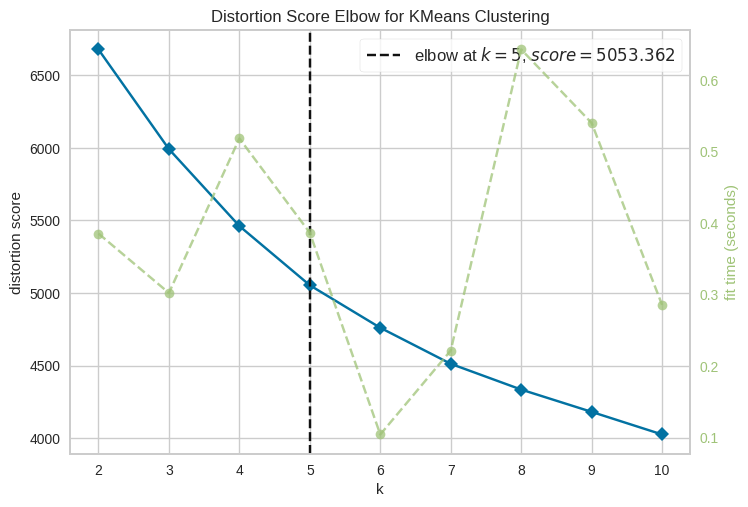

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_final)
Elbow_M.show()

หาค่า k ที่เหมาะสมกับการแบ่งกลุ่ม clusters โดยวิธีการ Elbow Method <br>
โดยค่า k ที่เหมาะสมที่สุดในการแบ่งกลุ่มคือ k=5



In [26]:
k=5
kmeans=KMeans(n_clusters=k, random_state=1).fit(df_final)
clusters=kmeans.labels_
centrids=kmeans.cluster_centers_
df["clusters"]=clusters
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,clusters
0,39,male,23.2,91,Yes,0,No,southeast,1121.87,0
1,24,male,30.1,87,No,0,No,southeast,1131.51,0
2,38,male,33.3,82,Yes,0,No,southeast,1135.94,4
3,38,male,33.7,80,No,0,No,northwest,1136.40,0
4,38,male,34.1,100,No,0,No,northwest,1137.01,4
...,...,...,...,...,...,...,...,...,...,...
1190,29,female,37.5,106,Yes,2,No,northwest,33471.97,2
1191,29,male,30.7,94,No,0,Yes,northeast,33475.82,2
1193,46,male,31.9,82,Yes,0,Yes,northwest,33750.29,2
1195,59,female,30.4,80,No,0,Yes,northwest,33907.55,2


In [27]:
df.groupby('clusters').describe().T

clusters                        0             1             2             3  \
age           count    260.000000    195.000000    210.000000    247.000000   
              mean      32.184615     37.702564     38.314286     50.773279   
              std        8.095267     10.161771     10.790138      6.145030   
              min       18.000000     18.000000     18.000000     37.000000   
              25%       26.000000     29.500000     29.250000     46.000000   
              50%       32.000000     38.000000     38.000000     51.000000   
              75%       38.000000     46.000000     46.000000     56.000000   
              max       52.000000     60.000000     60.000000     60.000000   
bmi           count    260.000000    195.000000    210.000000    247.000000   
              mean      26.487692     30.214359     27.980000     29.080567   
              std        4.780721      5.384562      4.862136      4.731819   
              min       16.000000     18.300000     17.800000     16.800000   
              25%       23.175000     26.700000     24.450000     25.800000   
              50%       26.300000     29.900000     27.600000     28.900000   
              75%       29.900000     33.500000     30.600000     32.550000   
              max       40.900000     46.800000     41.900000     40.200000   
bloodpressure count    260.000000    195.000000    210.000000    247.000000   
              mean      88.196154     90.025641     98.761905     89.404858   
              std        5.720314      6.966367      9.107570      6.293471   
              min       80.000000     80.000000     80.000000     80.000000   
              25%       83.000000     84.000000     92.250000     84.000000   
              50%       88.000000     89.000000    100.000000     89.000000   
              75%       92.000000     95.000000    106.000000     94.000000   
              max      100.000000    109.000000    118.000000    105.000000   
children      count    260.000000    195.000000    210.000000    247.000000   
              mean       0.596154      3.087179      0.995238      0.615385   
              std        0.757450      0.823364      1.046743      0.733799   
              min        0.000000      2.000000      0.000000      0.000000   
              25%        0.000000      3.000000      0.000000      0.000000   
              50%        0.000000      3.000000      1.000000      0.000000   
              75%        1.000000      3.000000      2.000000      1.000000   
              max        3.000000      5.000000      4.000000      3.000000   
claim         count    260.000000    195.000000    210.000000    247.000000   
              mean    6390.818654   9666.042872  19594.969333   7229.277328   
              std     4236.453169   4929.476152   6316.739227   4726.407357   
              min     1121.870000   2913.570000   9447.250000   1391.530000   
              25%     2708.015000   6086.200000  14221.557500   3207.435000   
              50%     5259.490000   8538.290000  19509.345000   6474.010000   
              75%     9307.937500  11811.545000  24036.605000  10169.360000   
              max    20167.340000  27941.290000  34303.170000  26236.580000   

clusters                        4  
age           count    264.000000  
              mean      32.806818  
              std        8.345930  
              min       18.000000  
              25%       26.000000  
              50%       32.000000  
              75%       39.000000  
              max       57.000000  
bmi           count    264.000000  
              mean      35.766667  
              std        4.696543  
              min       25.000000  
              25%       32.200000  
              50%       35.850000  
              75%       39.225000  
              max       46.700000  
bloodpressure count    264.000000  
              mean      93.329545  
              std        6.821552  
              min       80.000000  
    

<Axes: xlabel='bmi', ylabel='claim'>

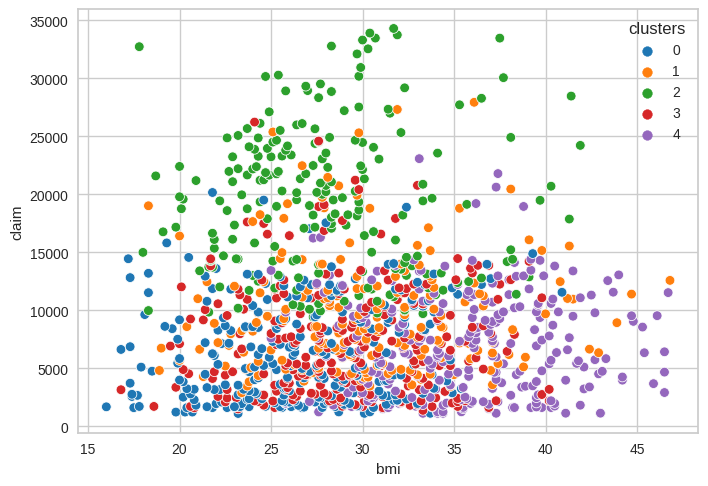

In [28]:
sns.scatterplot(x='bmi', y='claim', data=df, hue='clusters', palette="tab10")

จาก scatter plot แยกตามกลุ่ม cluster เมื่อเทียบตาม bmi กับ claim พบว่า มีบาง cluster ที่อยู่ในช่วง 0-15,000 ดอลลาร์ และตั้งแต่ 10,000-35,000 ดอลลาร์ แต่ด้วย data point ที่มีจำนวนมาก อาจจะทำให้ไม่สามารถสรุปผลได้ชัดเจน จึงต้องใช้ boxplot ในการสรุปผลในขั้นตอนต่อไป

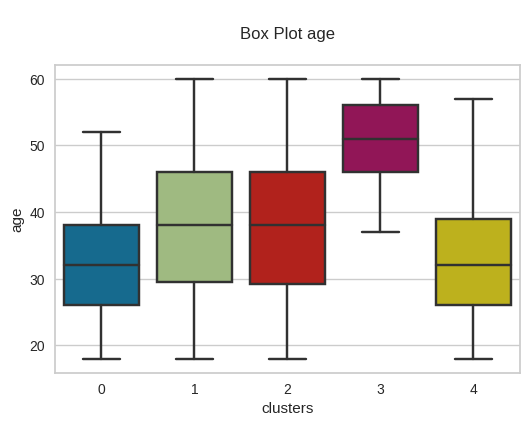

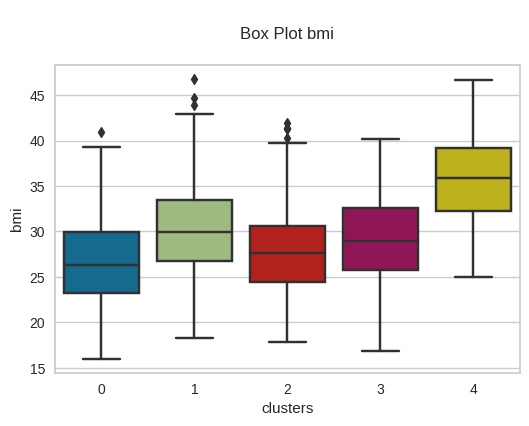

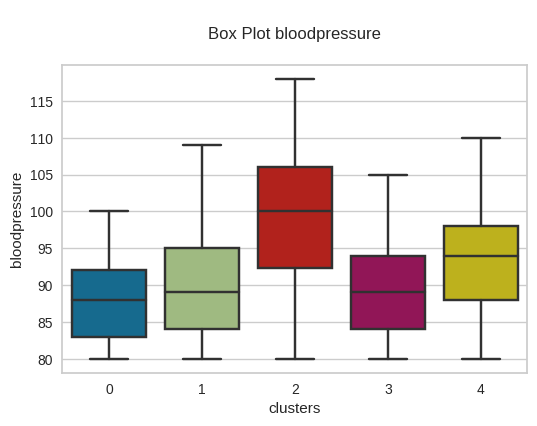

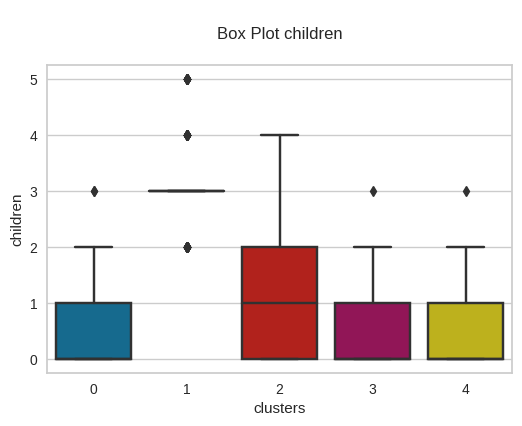

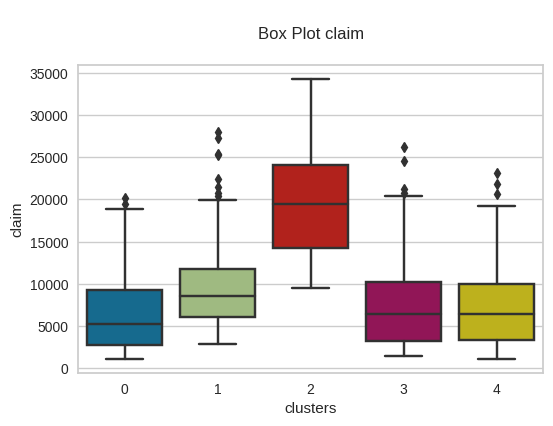

In [29]:
for i in num_cols:
    plt.figure(figsize=(6,4))
    ax = sns.boxplot(x = 'clusters',y = i, data = df)
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

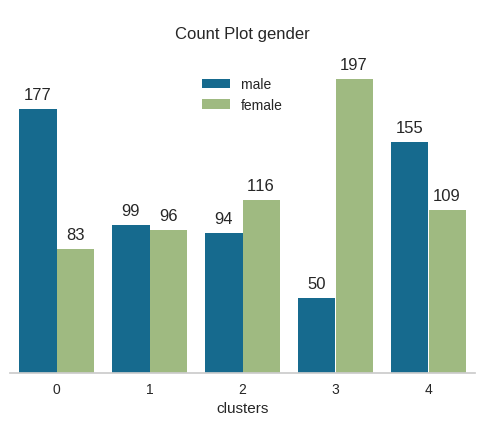

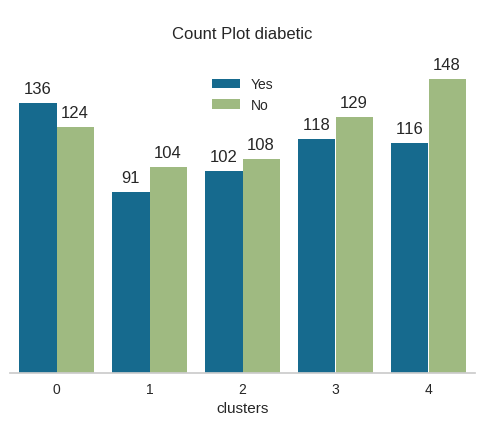

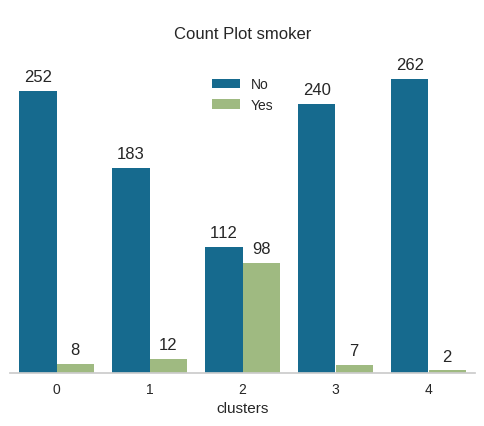

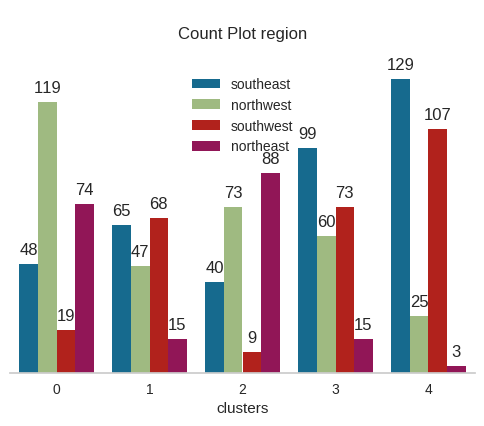

In [30]:
for i in cat_cols:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data = df, x = 'clusters', hue = i )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
    ax.legend(loc="upper center")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center',
                     va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')

    sns.despine(right=True,top = True, left = True)
    ax.axes.yaxis.set_visible(False)
    plt.show()

## Conclusion

*   cluster 0 ค่าสินไหมทดแทนอยู้ในช่วง 1,100-20,000 ดอลลาร์ มีช่วงอายุตั้งแต่ 18-52 ปี bmi ตั้งแต่ 16-40 bloodpressure อยู่ในช่วง 80-100 ส่วนใหญ่จะไม่มีลูก หรือมีแค่ 1-3 คน เพศชายเป็นส่วนใหญ่ และส่วนใหญ่จะเป็นผู้ไม่สูบบุหรี่ ส่วนใหญ่จะอาศัยอยู่ในภูมิภาคตะวันตกเฉียงเหนือและตะวันออกเฉียงเหนือ
*   cluster 1 ค่าสินไหมทดแทนอยู้ในช่วง 3,000-28,000 ดอลลาร์ มีช่วงอายุตั้งแต่ 18-60 ปี bmi ตั้งแต่ 18-47 bloodpressure อยู่ในช่วง 80-109 ส่วนใหญ่จะมีลูก 3 คน เพศหญิงและชายเท่าๆกัน ส่วนใหญ่จะเป็นผู้ไม่สูบบุหรี่ และส่วนใหญ่จะอาศัยอยู่ในภูมิภาคตะวันออกเฉียงใต้และตะวันตกเฉียงใต้
*   cluster 2 ค่าสินไหมทดแทนอยู่ในช่วง 9,400-34,000 ดอลลาร์ มีช่วงอายุตั้งแต่ 18-60 ปี bmi ตั้งแต่ 18-47 bloodpressure อยู่ในช่วง 80-118 จะมีลูกตั้งแต่ 0-4 คน เพศหญิงและชายเท่าๆกัน ผู้ที่สูบบุหรี่และไม่สูบบุหรี่เท่าๆกัน และส่วนใหญ่จะอาศัยอยู่ในภูมิภาคตะวันตกเฉียงเหนือและตะวันออกเฉียงเหนือ
*   cluster 3 ค่าสินไหมทดแทนอยู่ในช่วง 1,400-26,000 ดอลลาร์ มีช่วงอายุตั้งแต่ 37-60 ปี bmi ตั้งแต่ 17-40 bloodpressure อยู่ในช่วง 80-105 ส่วนใหญ่จะไม่มีลูก หรือมีแค่ 1-3 คน เพศหญิงเป็นส่วนใหญ่ ส่วนใหญ่จะเป็นผู้ไม่สูบบุหรี่ และส่วนใหญ่จะอาศัยอยู่ในภูมิภาคตะวันออกเฉียงใต้และตะวันตกเฉียงใต้
*   cluster 4 ค่าสินไหมทดแทนอยู่ในช่วง 1,100-23,000 ดอลลาร์ มีช่วงอายุตั้งแต่ 18-57 ปี bmi ตั้งแต่ 25-47 bloodpressure อยู่ในช่วง 80-110 ส่วนใหญ่จะไม่มีลูก หรือมีแค่ 1-3 คน เพศหญิงและชายเท่าๆกัน ส่วนใหญ่จะเป็นผู้ไม่สูบบุหรี่
และส่วนใหญ่จะอาศัยอยู่ในภูมิภาคตะวันออกเฉียงใต้และตะวันตกเฉียงใต้ <br>

*   ผู้ป่วยโรคเบาหวานมีจำนวนเท่าๆกันในทุก cluster










### Claim distribution

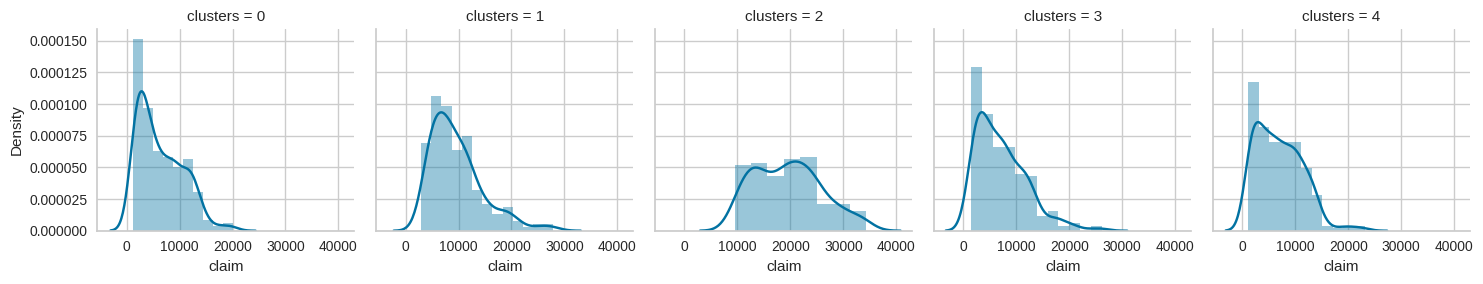

In [31]:
g = sns.FacetGrid(col='clusters',data=df,legend_out=False)
g.map(sns.distplot,'claim')

In [ ]:
#!pip install fitter

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,1.231376e-08,2209.734695,2230.014192,inf,0.043048,2.484300e-02
expon,1.795216e-08,2204.277473,2214.417221,inf,0.076902,1.702266e-06
pareto,1.795216e-08,2206.277474,2221.487096,inf,0.076902,1.702263e-06
lognorm,2.126389e-08,2221.399318,2236.608941,inf,0.051100,4.148416e-03
norm,3.854340e-08,2290.609351,2300.749100,inf,0.107317,3.003326e-12


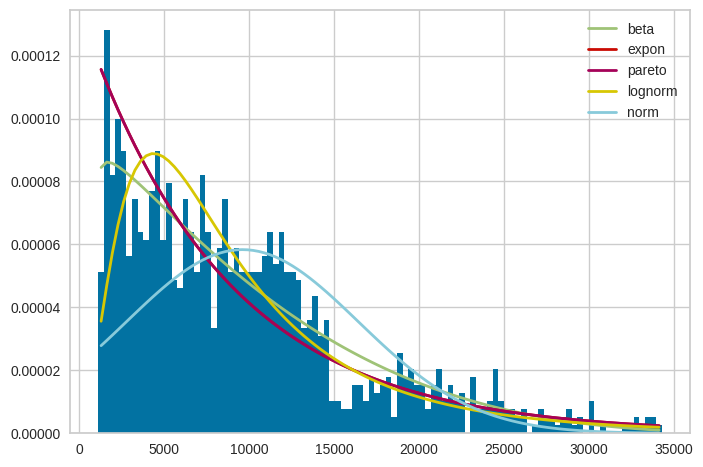

In [94]:
from fitter import Fitter
df_claim = df.claim.values
f = Fitter(df_claim, distributions=['beta', 'expon', 'lognorm', 'norm', 'pareto'])
f.fit()
f.summary()

In [95]:
f.get_best(method = 'aic')

{'expon': {'loc': 1121.87, 'scale': 8484.640331632654}}

ใช้ Library ชื่อว่า Fitter เพื่อหาการแจกแจง ที่ fit กับข้อมูลที่มี และเลือกการแจกแจงที่เหมาะสมที่สุดจากค่า AIC ดังนั้นจึงเลือกการแจกแจง Exponential

## Premium Principle


$E(L) = E(S) - E(P)$ <br>
$E(L) = 0 : Equivalent\ Principle $ <br>
$0 = E(S) - E(P)$ <br>
ดังนั้น $E(P) = E(S)$ <br>
หา $E(P)\ จาก\  E(S) =E(X_0 + X_1 + X_2 + X_3 + X_4)$ <br>
$E(S) = E(X_0) + E(X_1) + E(X_2) + E(X_3) + E(X_4)$

### หา $E(X_0)$

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,1.380128e-07,2079.383454,2086.504817,inf,0.090669,0.026084


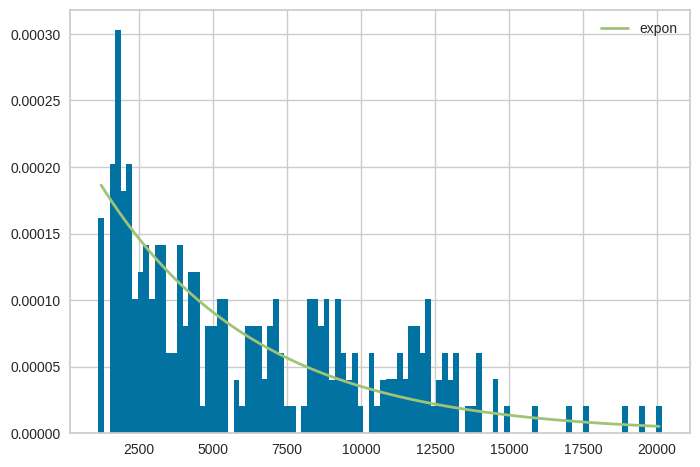

In [96]:
cl0 = df[df['clusters'] == 0]
cl0_val = cl0['claim'].values
from fitter import Fitter
f = Fitter(cl0_val, distributions=['expon'])
f.fit()
f.summary()

In [97]:
f.get_best(method = 'aic')

{'expon': {'loc': 1121.87, 'scale': 5268.948653846153}}

cluster 0 มีการแจกแจงแบบ  $X \sim \operatorname{Exp}(5,268.95)$<br>
ดังนั้น $E(X_0) = 5,268.95$



### หา $E(X_1)$

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,1.226209e-07,2138.178064,2144.724063,inf,0.129951,0.002486


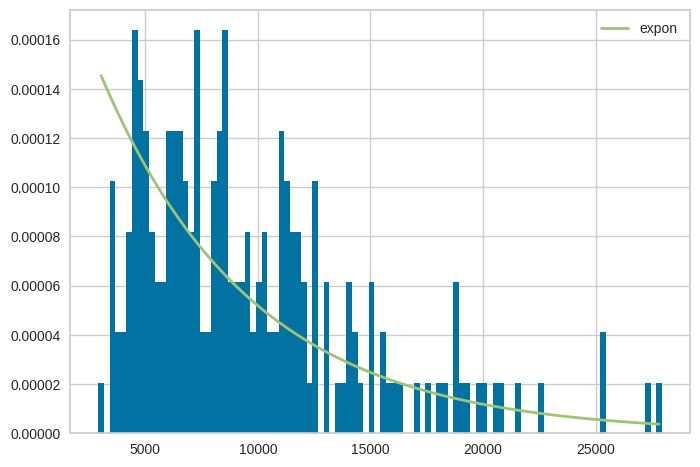

In [98]:
cl1 = df[df['clusters'] == 1]
cl1_val = cl1['claim'].values
f = Fitter(cl1_val, distributions=['expon'])
f.fit()
f.summary()

In [99]:
f.get_best(method = 'aic')

{'expon': {'loc': 2913.57, 'scale': 6752.472871794871}}

cluster 1 มีการแจกแจงแบบ  $X \sim \operatorname{Exp}(6,752.47)$<br>
ดังนั้น $E(X_1) = 6,752.47$


### หา $E(X_2)$

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,1.089836e-07,2093.941801,2100.636016,inf,0.164339,0.00002


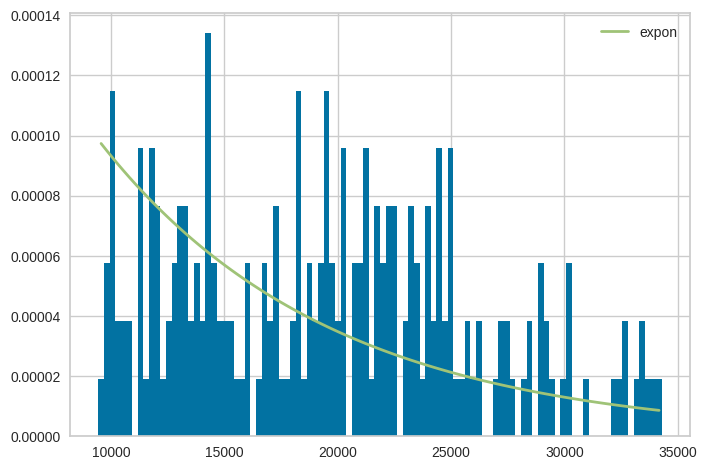

In [100]:
cl2 = df[df['clusters'] == 2]
cl2_val = cl2['claim'].values
f = Fitter(cl2_val, distributions=['expon'])
f.fit()
f.summary()

In [101]:
f.get_best(method = 'aic')

{'expon': {'loc': 9447.25, 'scale': 10147.71933333333}}

cluster 2 มีการแจกแจงแบบ  $X \sim \operatorname{Exp}(10,147.72)$<br>
ดังนั้น $E(X_1) = 10,147.72$


### หา $E(X_3)$

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,7.596586e-08,2164.013157,2171.031934,inf,0.083334,0.061094


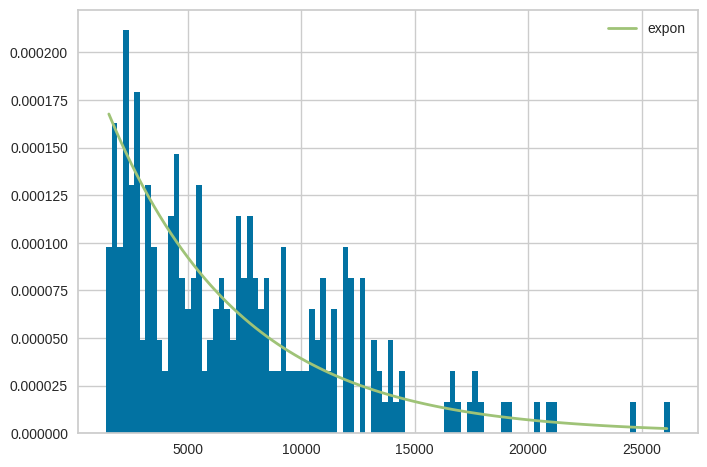

In [102]:
cl3 = df[df['clusters'] == 3]
cl3_val = cl3['claim'].values
f = Fitter(cl3_val, distributions=['expon'])
f.fit()
f.summary()

In [103]:
f.get_best(method = 'aic')

{'expon': {'loc': 1391.53, 'scale': 5837.747327935223}}

cluster 3 มีการแจกแจงแบบ  $X \sim \operatorname{Exp}(5,837.75)$<br>
ดังนั้น $E(X_3) = 5,837.75$


### หา $E(X_4)$

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,1.067609e-07,2113.336763,2120.488661,inf,0.114328,0.001838


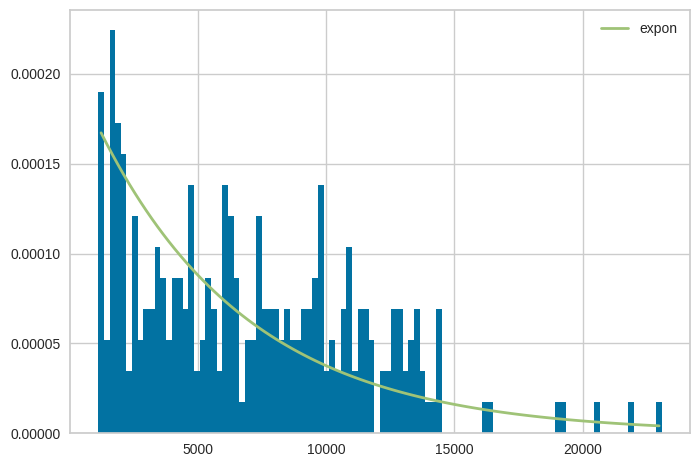

In [104]:
cl4 = df[df['clusters'] == 4]
cl4_val = cl4['claim'].values
f = Fitter(cl4_val, distributions=['expon'])
f.fit()
f.summary()

In [105]:
f.get_best(method = 'aic')

{'expon': {'loc': 1135.94, 'scale': 5872.355}}

cluster 3 มีการแจกแจงแบบ  $X \sim \operatorname{Exp}(5,872.36)$<br>
ดังนั้น $E(X_3) = 5,872.36$


จะได้ <br>
$E(S) = 5,268.95 + 6,752.47 + 10,147.72 + 5,837.75 + 5,872.36$<br>
$E(S) = E(P) =  33,879.25$ <br>
ดังนั้น จะต้องเก็บ premium ทั้งหมดประมาณ 33,879.25 ดอลลาร์ หรือคนละ 28.81 ดอลลาร์

# Credibility Theory

สมมติให้จำนวน claim ที่เกิดขึ้นภายในหนึ่งปี มีการแจกแจงแบบปัวซง (Poisson distribution) และค่าสินไหมทดแทน มีการแจกแจงแบบเอกซ์โพเนนเชียล (Exponential distribution) และค่าสินไหมทดแทนทั้งหมด 5 ปี คือ 8,500 ดอลลาร์

$ E(S|λ, β) = E(N)E(X) = λβ $ <br>
$ Var(S|λ, β) = λβ^2 + β^2λ = 2λβ^2 $

In [109]:
for i in [0, 1, 2, 3, 4]:
  cl = df[df['clusters'] == i]
  cnt = cl.claim.count()
  all = df.claim.count()
  pop = round((cnt/all)*100)
  print(i, pop)

0 22
1 17
2 18
3 21
4 22


หา Percentage of Population ในแต่ละ cluster

$μ_0 = 0.5(5,268.95) = 2,634.48$ <br>
$μ_1 = 1.0(6,752.47) = 6,752.47$ <br>
$μ_2 = 1.0(10,147.72) = 10,147.72$ <br>
$μ_3 = 1.5(5,837.75) = 8,756.63$ <br>
$μ_4 = 2.0(5,872.36) = 11,744.72$ <br>
$μ = 0.22(2,634.48) + 0.17(6,752.47) + 0.18(10,147.72) + 0.21(8,756.63) + 0.22(11,744.72)$ <br> $μ = 579.59+1147.92+1826.59+1838.89+2583.84$ <br> $μ = 7,982.83$ <br><br>
$VHM = 0.22(2,634.48-7,982.83)^2 + 0.17(6,752.47-7,982.83)^2 + 0.18(10,147.72-7,982.83)^2 + 0.21(8,756.63-7,982.83)^2 + 0.22(11,744.72-7,982.83)^2 $ <br><br>
$VHM = 6,296,687.63$

$σ^2_0 = 2(0.5)(5,268.95)^2 = 13,864,388.55$ <br>
$σ^2_1 = 2(1.0)(6,752.47)^2 = 91,178,320.60$ <br>
$σ^2_2 = 2(1.0)(10,147.72)^2 = 206,060,491.23$ <br>
$σ^2_3 = 2(1.5)(5,837.75)^2 = 204,193,692.19$ <br>
$σ^2_4 = 2(2.0)(11,744.72)^2 = 551,268,708.04$ <br><br>
$EPV = 0.22(13,864,388.55) + 0.17(91,178,320.60) + 0.18(206,060,491.23) + 0.21(204,193,692.19) + 0.22(551,268,708.04)$ <br><br>
$EPV = 219,601,157.15$

$X̄_5 = 8,500/5 = 1,700$ <br>
$K = 219,601,157.15/6,296,687.63 = 34.85$ <br>
$Z = 5/(5+34.85) = 0.13$ <br><br>
$μᶿ = 0.13(1,700) + (1 - 0.13)7,982.83 = 7,165.9$